# Batsman

In [ ]:
import pandas as pd

# Load CSV dataset of batsman
batsman_dataframe_2008=pd.read_csv("Most Runs - 2008.csv")
batsman_dataframe_2009=pd.read_csv("Most Runs - 2009.csv")
batsman_dataframe_2010=pd.read_csv("Most Runs - 2010.csv")
batsman_dataframe_2011=pd.read_csv("Most Runs - 2011.csv")
batsman_dataframe_2012=pd.read_csv("Most Runs - 2012.csv")
batsman_dataframe_2013=pd.read_csv("Most Runs - 2013.csv")
batsman_dataframe_2014=pd.read_csv("Most Runs - 2014.csv")
batsman_dataframe_2015=pd.read_csv("Most Runs - 2015.csv")
batsman_dataframe_2016=pd.read_csv("Most Runs - 2016.csv")
batsman_dataframe_2017=pd.read_csv("Most Runs - 2017.csv")
batsman_dataframe_2018=pd.read_csv("Most Runs - 2018.csv")
batsman_dataframe_2019=pd.read_csv("Most Runs - 2019.csv")
batsman_dataframe_2020=pd.read_csv("Most Runs - 2020.csv")
batsman_dataframe_2021=pd.read_csv("Most Runs - 2021.csv")



# Preprocessing

In [ ]:
years = list(range(2008, 2022))
new_dataframe = pd.DataFrame()
for year in years:
    dataframe_name = f"batsman_dataframe_{year}"
    dataframe = globals().get(dataframe_name, None)

    if dataframe is not None:

        null_values = dataframe[dataframe.isnull().any(axis=1)]

        if not null_values.empty:
            print(f"Null values found in {year}:")
            print(null_values)
            print("Deleting rows with null values...")

            dataframe.dropna(inplace=True)
            print("Null values deleted.")
            print("------------------------------")
        duplicate_rows = dataframe[dataframe.duplicated(subset=['Player'], keep='first')]

        if not duplicate_rows.empty:
            print(f"Duplicates deleted in {year}:")
            print(duplicate_rows)
            print("------------------------------")

            dataframe.drop_duplicates(subset=['Player'], keep='first', inplace=True)
        dataframe['Year'] = year
        new_dataframe = pd.concat([new_dataframe, dataframe], ignore_index=True)




Duplicates deleted in 2009:
    POS          Player  Mat  Inns  NO  Runs  HS   Avg  BF      SR  100  50  \
69   70  Shikhar Dhawan    5     4   0    40  22  10.0  45   88.88    0   0   
90   91   Ishant Sharma   11     3   1    16   9   8.0  13  123.07    0   0   

    4s  6s  
69   3   0  
90   1   1  
------------------------------


# Exploratory Data Analysis

In [ ]:
 !pip install pandas-profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(new_dataframe, title='Pandas Profiling Report', explorative=True)

profile.to_file("report_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Giving performance score to each player according to his current year performance

splitting the data into Train-val-test

In [ ]:
!pip install tabulate

import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

correlation_dataframe = new_dataframe.copy(deep=True)
correlation_dataframe.drop(columns=['POS', 'Player','Year'], inplace=True)

correlation_matrix = correlation_dataframe.corr()
average_corr = correlation_matrix.mean()

normalized_weights = average_corr / average_corr.sum()


normalized_weights /= normalized_weights.sum()

table_data = []
for column, weight in normalized_weights.items():
    table_data.append([column, f"{weight:.3f}"])

table_headers = ["Column", "Weight"]
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")
print(table)


+--------+--------+
| Column | Weight |
+--------+--------+
|  Mat   | 0.085  |
|  Inns  | 0.109  |
|   NO   | 0.054  |
|  Runs  | 0.116  |
|  Avg   | 0.096  |
|   BF   | 0.113  |
|   SR   | 0.063  |
|  100   | 0.052  |
|   50   | 0.099  |
|   4s   | 0.109  |
|   6s   | 0.105  |
+--------+--------+


<ipython-input-151-305e52457d2e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_dataframe.corr()


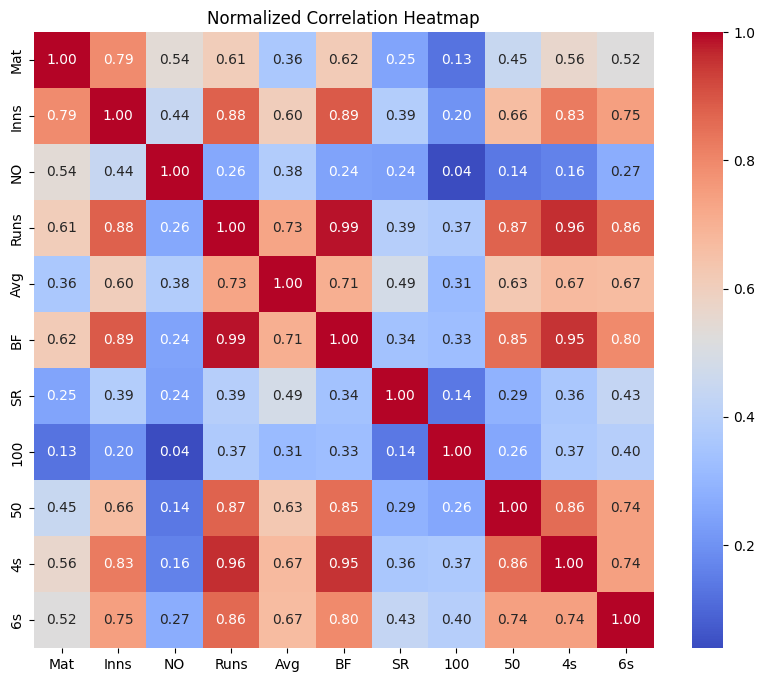

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Normalized Correlation Heatmap")
plt.show()

# now lets proceed with providing the performance score


In [ ]:
from sklearn.preprocessing import MinMaxScaler

weights_dict = {
    'Mat': 0.084,
    'Inns': 0.106,
    'NO': 0.053,
    'Runs': 0.114,
    'Avg': 0.094,
    'BF': 0.110,
    'SR': 0.062,
    '100': 0.051,
    '50': 0.097,
    '4s': 0.107,
    '6s': 0.104,
    'Year': 0.018
}


selected_columns = ['Mat', 'Inns', 'NO', 'Runs', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']
player_data = new_dataframe[selected_columns]


player_scores = (player_data * pd.Series(weights_dict)).sum(axis=1)


scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(player_scores.values.reshape(-1, 1))


new_dataframe['Scaled_Score'] = scaled_scores

combining_dataframe_1=new_dataframe.drop(columns=['POS','Mat', 'Inns', 'NO', 'Runs', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s','HS'])



# Bowlers

In [ ]:
bowlersdataframe_2008=pd.read_csv("/content/Best Bowling Economy Innings - 2008.csv")
bowlersdataframe_2009=pd.read_csv("/content/Best Bowling Economy Innings - 2009.csv")
bowlersdataframe_2010=pd.read_csv("/content/Best Bowling Economy Innings - 2010.csv")
bowlersdataframe_2011=pd.read_csv("/content/Best Bowling Economy Innings - 2011.csv")
bowlersdataframe_2012=pd.read_csv("/content/Best Bowling Economy Innings - 2012.csv")
bowlersdataframe_2013=pd.read_csv("/content/Best Bowling Economy Innings - 2013.csv")
bowlersdataframe_2014=pd.read_csv("/content/Best Bowling Economy Innings - 2014.csv")
bowlersdataframe_2015=pd.read_csv("/content/Best Bowling Economy Innings - 2015.csv")
bowlersdataframe_2016=pd.read_csv("/content/Best Bowling Economy Innings - 2016.csv")
bowlersdataframe_2017=pd.read_csv("/content/Best Bowling Economy Innings - 2017.csv")
bowlersdataframe_2018=pd.read_csv("/content/Best Bowling Economy Innings - 2018.csv")
bowlersdataframe_2019=pd.read_csv("/content/Best Bowling Economy Innings - 2019.csv")
bowlersdataframe_2020=pd.read_csv("/content/Best Bowling Economy Innings - 2020.csv")
bowlersdataframe_2021=pd.read_csv("/content/Best Bowling Economy Innings - 2021.csv")



In [ ]:
years = list(range(2008, 2022))
new_dataframe_bowler = pd.DataFrame()
for year in years:
    dataframe_name = f"bowlersdataframe_{year}"
    dataframe = globals().get(dataframe_name, None)

    if dataframe is not None:
        null_values = dataframe[dataframe.isnull().any(axis=1)]

        if not null_values.empty:
            print(f"Null values found in {year}:")
            print(null_values)
            print("Deleting rows with null values...")

            dataframe.dropna(inplace=True)
            print("Null values deleted.")
            print("------------------------------")

        duplicate_rows = dataframe[dataframe.duplicated(subset=['Player'], keep=False)]
        if not duplicate_rows.empty:
          print(f"Duplicates found in {year}:")
          print(duplicate_rows)
          print("------------------------------")


          columns_to_sum = ['Ov', 'Runs', 'Wkts', 'Dots']
          dataframe.loc[duplicate_rows.index, columns_to_sum] = dataframe.groupby('Player')[columns_to_sum].transform('sum')



          columns_to_mean = ['Econ', 'SR']
          dataframe.loc[duplicate_rows.index, columns_to_mean] = dataframe.groupby('Player')[columns_to_mean].transform('mean')

          dataframe.drop_duplicates(subset=['Player'], keep='first', inplace=True)

        dataframe['Year'] = year
        new_dataframe_bowler = pd.concat([new_dataframe_bowler, dataframe], ignore_index=True)


Duplicates found in 2008:
     POS          Player   Ov  Runs  Wkts  Dots  Econ    SR Against  \
1      2   Ishant Sharma  4.0     9     2    14  2.25  12.0     RCB   
3      4   Shaun Pollock  4.0     9     1    17  2.25  24.0     CSK   
5      6  Sourav Ganguly  3.0     7     1    10  2.33  18.0     RCB   
6      7   Sohail Tanvir  4.0    10     3    18  2.50   8.0     RCB   
7      8    Irfan Pathan  4.0    10     1    17  2.50  24.0      RR   
..   ...             ...  ...   ...   ...   ...   ...   ...     ...   
144  145     Munaf Patel  4.0    24     0     8  6.00   0.0      DC   
145  146   Ishant Sharma  3.0    18     0     6  6.00   0.0      DC   
146  147   Piyush Chawla  4.0    25     3    12  6.25   8.0     RCB   
147  148    Ashish Nehra  4.0    25     3    10  6.25   8.0      DC   
148  149    Ajit Agarkar  4.0    25     3    15  6.25   8.0     RCB   

                      Venue     Match Date  
1    M. Chinnaswamy Stadium  18 April 2008  
3          Wankhede Stadium    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

correlation_dataframe_bowler = new_dataframe_bowler.copy(deep=True)
correlation_dataframe_bowler.drop(columns=['POS','Year','Against','Venue','Match Date'], inplace=True)

correlation_matrix_bowler = correlation_dataframe_bowler.corr()
average_corr_bowler = correlation_matrix_bowler.mean()

normalized_weights_bowler = average_corr_bowler / average_corr_bowler.sum()

normalized_weights_bowler /= normalized_weights_bowler.sum()

table_data = []
for column, weight in normalized_weights_bowler.items():
    table_data.append([column, f"{weight:.3f}"])

table_headers = ["Column", "Weight"]
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")
print(table)


+--------+--------+
| Column | Weight |
+--------+--------+
|   Ov   | 0.221  |
|  Runs  | 0.226  |
|  Wkts  | 0.199  |
|  Dots  | 0.213  |
|  Econ  | 0.059  |
|   SR   | 0.082  |
+--------+--------+


<ipython-input-156-32ac457f9fcd>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_bowler = correlation_dataframe_bowler.corr()


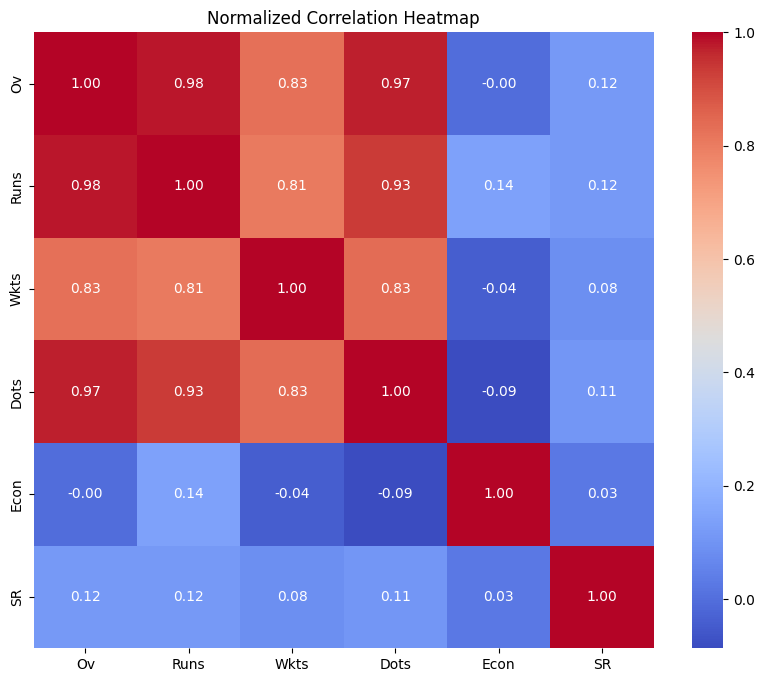

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_bowler, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Normalized Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

weights_dict = {
    'Ov': 0.221,
    'Runs': 0.226,
    'Wkts': 0.199,
    'Dots': 0.213,
    'Econ': 0.059,
    'SR': 0.082
}

selected_columns = ['Ov','Runs','Wkts','Dots','Econ','SR']
player_data = new_dataframe_bowler[selected_columns]

player_scores = (player_data * pd.Series(weights_dict)).sum(axis=1)

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(player_scores.values.reshape(-1, 1))


new_dataframe_bowler['Scaled_Score'] = scaled_scores

combining_dataframe_2=new_dataframe_bowler.drop(columns=['POS','Against','Venue','Match Date','Ov','Runs','Wkts','Dots','Econ','SR'])


In [ ]:
print(combining_dataframe_1[combining_dataframe_1['Player'] == 'Rahul Tewatia'])


             Player  Year  Scaled_Score
969   Rahul Tewatia  2014      0.058364
1366  Rahul Tewatia  2017      0.076804
1496  Rahul Tewatia  2018      0.096968
1636  Rahul Tewatia  2019      0.075225
1734  Rahul Tewatia  2020      0.313420
1874  Rahul Tewatia  2021      0.212662


In [ ]:
print(combining_dataframe_2[combining_dataframe_2['Player'] == 'Rahul Tewatia'])

            Player  Year  Scaled_Score
429  Rahul Tewatia  2014      0.167004
580  Rahul Tewatia  2017      0.125116
657  Rahul Tewatia  2018      0.168680
674  Rahul Tewatia  2019      0.049347
738  Rahul Tewatia  2020      0.278256
821  Rahul Tewatia  2021      0.054555


In [ ]:

combined_df = pd.concat([combining_dataframe_1, combining_dataframe_2], ignore_index=True)

combined_df['Scaled_Score'] = combined_df.groupby(['Year', 'Player'])['Scaled_Score'].transform('mean')


duplicate_rows = combined_df[combined_df.duplicated(subset=['Year', 'Player'], keep='first')]

combined_df.drop_duplicates(subset=['Year', 'Player'], keep='first', inplace=True)

combined_df


,Player,Year,Scaled_Score
0,Shaun Marsh,2008,0.675587
1,Gautam Gambhir,2008,0.586725
2,Sanath Jayasuriya,2008,0.327266
3,Shane Watson,2008,0.459372
4,Graeme Smith,2008,0.516421
...,...,...,...
2771,Imran Tahir,2021,0.069986
2799,Umran Malik,2021,0.085909
2806,Riley Meredith,2021,0.066646
2810,Amit Mishra,2021,0.084060


In [ ]:
print(combined_df[combined_df['Player'] == 'Rahul Tewatia'])

             Player  Year  Scaled_Score
969   Rahul Tewatia  2014      0.112684
1366  Rahul Tewatia  2017      0.100960
1496  Rahul Tewatia  2018      0.132824
1636  Rahul Tewatia  2019      0.062286
1734  Rahul Tewatia  2020      0.295838
1874  Rahul Tewatia  2021      0.133608


In [ ]:
duplicate_rows

,Player,Year,Scaled_Score
1984,Mohammad Hafeez,2008,0.056948
1985,Ishant Sharma,2008,0.118945
1986,Brett Lee,2008,0.065658
1987,Shaun Pollock,2008,0.344402
1988,Dominic Thornely,2008,0.058598
...,...,...,...
2805,Rahul Tewatia,2021,0.133608
2807,Chris Morris,2021,0.107466
2808,Glenn Maxwell,2021,0.318850
2809,Chetan Sakariya,2021,0.071749


# Downloading Final PLayers performance score dataset to csv

In [ ]:
combined_df.to_csv('final_players_performance_scores.csv', index=False)